In [ ]:
import os
PROJECT_DIR = os.path.abspath(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd())
os.environ['MPLCONFIGDIR'] = os.path.join(PROJECT_DIR, '.mplconfig')
os.environ['MPL_SKIP_MACOS_FONTS'] = '1'


In [191]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

#Loading the Data
df = pd.read_csv('brfss_2022_final.csv')

# Display the first few rows of the DataFrame
print(df.head(10))

   DRNK3GE5  SLEPTIM1  EMTSUPRT  INCOME3  SEXVAR
0       NaN       8.0       1.0     99.0       2
1       NaN       6.0       1.0      5.0       2
2       NaN       5.0       2.0     10.0       2
3       NaN       7.0       1.0     77.0       2
4      88.0       9.0       1.0      5.0       2
5       NaN       7.0       2.0     99.0       1
6      88.0       7.0       1.0      8.0       2
7       NaN       8.0       1.0      7.0       2
8       NaN       6.0       1.0      7.0       2
9      88.0       7.0       1.0      7.0       2


In [193]:
# Checking out the data

# Check the dataset shape
print(f"Dataset shape: {df.shape}")

# Check missing values
print("\nMissing values per column:\n", df.isna().sum())

# Check `y` (target variable) distribution
print("\nTarget variable (y) summary:\n", df['DRNK3GE5'].describe())

# Check for NaNs in X and y before train-test split
X = df.drop(columns=['DRNK3GE5'])  # Features
y = df['DRNK3GE5']                 # Target

print(f"\nMissing values in X: {X.isna().sum().sum()}")
print(f"Missing values in y: {y.isna().sum()}")

# Check unique values in target variable
print("\nUnique values in y:", y.unique())

Dataset shape: (445132, 5)

Missing values per column:
 DRNK3GE5    235283
SLEPTIM1         3
EMTSUPRT    190991
INCOME3      12932
SEXVAR           0
dtype: int64

Target variable (y) summary:
 count    209849.000000
mean         65.323223
std          37.089638
min           1.000000
25%          15.000000
50%          88.000000
75%          88.000000
max          99.000000
Name: DRNK3GE5, dtype: float64

Missing values in X: 203926
Missing values in y: 235283

Unique values in y: [nan 88.  4.  1.  2.  7.  3. 77. 15. 20.  6. 30.  5.  8. 10. 29. 12. 99.
 25. 14. 21. 76. 16. 13. 17. 28. 26.  9. 24. 18. 22. 11. 27. 36. 33. 31.
 45. 40. 23. 60. 69. 19. 50. 46. 54. 55. 70. 75.]


In [209]:
# Handle missing target variable 'DRNK3GE5' by dropping rows with missing values
df = df.dropna(subset=['DRNK3GE5'])

# Handle missing values in the feature columns
# Impute missing values in 'SLEPTIM1' with the median (since it's a continuous variable)
imputer_sleptim1 = SimpleImputer(strategy='median')
df['SLEPTIM1'] = imputer_sleptim1.fit_transform(df[['SLEPTIM1']])

# Re-run the model testing code now that missing values have been handled
X = df.drop(columns=['DRNK3GE5'])
y = df['DRNK3GE5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
# Check missing values
print("\nMissing values per column:\n", df.isna().sum())


Missing values per column:
 DRNK3GE5    0
SLEPTIM1    0
EMTSUPRT    0
INCOME3     0
SEXVAR      0
dtype: int64


# Model 2: Linear Regression

In [213]:
# Linear Regression Model
linear_model = LinearRegression()

# Create a pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', linear_model)
])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display the results
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")

Linear Regression - MSE: 1356.4327028047553, R2: 0.013816543916983837


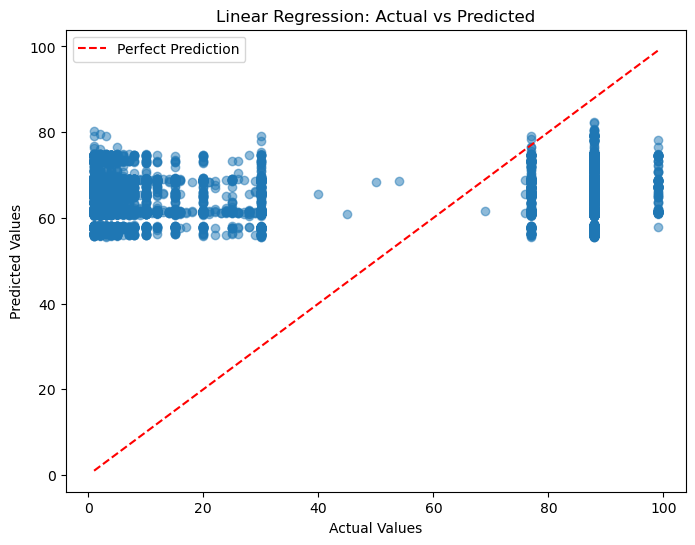

In [219]:
# Make predictions with the linear regression model
y_pred_linear = linear_pipeline.predict(X_test)

# Create a scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Model 2: Random Forest Regressor

In [215]:
# Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', random_forest_model)
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 1361.412794286897, R2: 0.010195808572493359


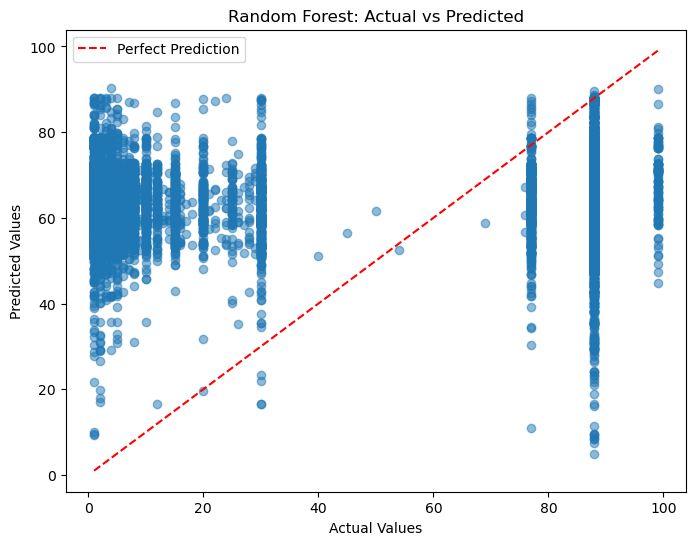

In [221]:
# Make predictions with the Random Forest model
y_pred_rf = rf_pipeline.predict(X_test)

# Create a scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

# Model 3: Gradient Boosting Regressor

In [217]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)

# Create a pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

Gradient Boosting - MSE: 1349.3348234771126, R2: 0.01897699983324197


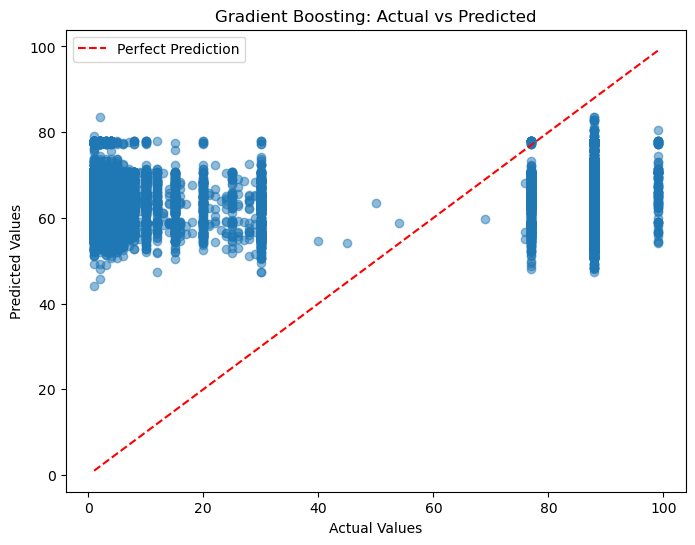

In [223]:
# Make predictions with the Gradient Boosting model
y_pred_gb = gb_pipeline.predict(X_test)

# Create a scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.legend()
plt.show()

## Which model is best

Linear Regression:
MSE: 1356.43
R2: 0.014

Random Forest:
MSE: 1361.41
R2: 0.010

Gradient Boosting:
MSE: 1349.33
R2: 0.019

MSE: The lower the MSE, the better the model's predictions match the actual values. A smaller value means less error.

R2: The higher the R2, the better the model is at explaining the variance in the target variable. A higher R2 means the model is a better fit for the data.

Conclusion:
The Gradient Boosting Regressor has the lowest MSE (1349.33) and the highest R2 (0.019), making it the best performing model among the three. While the improvement in R2 is small, the Gradient Boosting Regressor is still the most accurate in terms of minimizing error (MSE).



## Other Questions

Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?

No, my data doesn’t involve time series: The dataset I am working with (from BRFSS) seems to be cross-sectional, meaning that it contains data collected at a single point or over a series of discrete observations, without a specific temporal ordering or time-based predictions. Variables like alcohol consumption or sleep time are not tied to a time series structure (e.g., daily or monthly values over time).
I am predicting a target variable (DRNK3GE5), which seems to be related to alcohol consumption, and I am using other features (such as sleep time, income, and support) as inputs. However, these features don’t appear to represent time-ordered data.

Is my response variable continuous or categorical?

The response variable (DRNK3GE5) is continuous, as it takes on a range of numeric values rather than distinct categories.


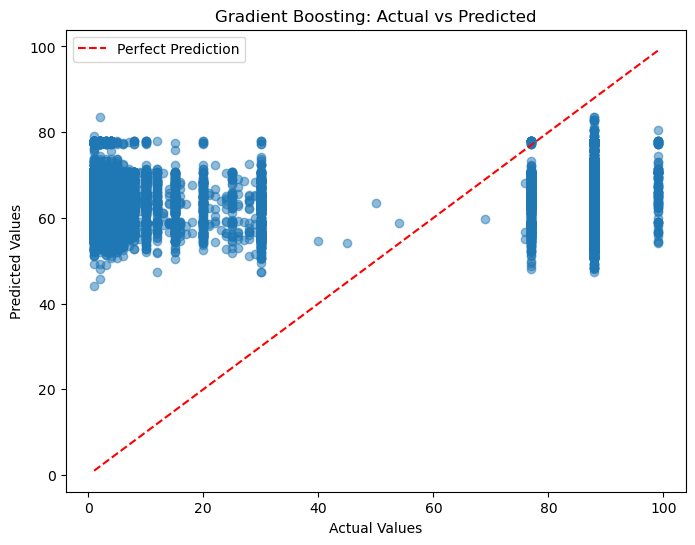

In [227]:
# Example code for generating Actual vs Predicted plot for Gradient Boosting
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting Predictions
y_pred_gb = gb_pipeline.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.legend()
plt.show()